In [124]:
#importing standard data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as st
import bokeh
import bokeh.io
import iqplot
bokeh.io.output_notebook()
#suppress warnings
warnings.filterwarnings('ignore')
%matplotlib inline  


#import data /Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Rubio et al. 2021/gkaa1180_supplemental_files/Dataset_S1_mRNA_counts.xlsx taking together sheets: Cadmium, Heat Shock, H2O2, MMS, Sorbitol
for i in ["Cadmium", "Heat Shock", "H2O2", "MMS", "Sorbitol"]:
    df = pd.read_excel('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Rubio et al. 2021/gkaa1180_supplemental_files/Dataset_S1_mRNA_counts.xlsx', sheet_name=i, index_col=0)
    df = df.transpose()
    df = df.reset_index()
    df = df.rename(columns={'index': 'Sample'})
    df['Treatment'] = i
    if i == "Cadmium":
        df_rna = df
    else:
        df_rna = df_rna.append(df)

#In Sample, remove rna_ from start of each sample name. Then break Sample to 4 columns to genotype, treatment, time, replicate
df_rna['Sample'] = df_rna['Sample'].str.replace('rna_', '')
df_rna[['Genotype', 'Treatment', 'Time', 'Replicate']] = df_rna['Sample'].str.split('_', expand=True)


#same for RPF counts
for i in ["Cadmium", "Heat Shock", "H2O2", "MMS", "Sorbitol"]:
    df = pd.read_excel('/Users/bencekover/Library/CloudStorage/OneDrive-UniversityCollegeLondon/MSci Bahler lab/S.-Pombe-biofilm/external data/Rubio et al. 2021/gkaa1180_supplemental_files/Dataset_S2_RPF_counts.xlsx', sheet_name=i, index_col=0)
    df = df.transpose()
    df = df.reset_index()
    df = df.rename(columns={'index': 'Sample'})
    df['Treatment'] = i
    if i == "Cadmium":
        df_rpf = df
    else:
        df_rpf = df_rpf.append(df)


    
df_rpf['Sample'] = df_rpf['Sample'].str.replace('ribo_', '')
#check if sample name contains _"exp" and two numbers_ and remove that
df_rpf['Sample'] = df_rpf['Sample'].str.replace('_exp\d\d', '')
df_rpf[['Genotype', 'Treatment', 'Time', 'Replicate']] = df_rpf['Sample'].str.split('_', expand=True)


#in both dataaframes, go through the Genotype column and rename wt to WT, s52a to eIF2α (s52a) and sty1delta to sty1Δ
for i in [df_rna, df_rpf]:
    i['Genotype'] = i['Genotype'].str.replace('wt', 'WT')
    i['Genotype'] = i['Genotype'].str.replace('s52a', 'eIF2α (s52a)')
    i['Genotype'] = i['Genotype'].str.replace('sty1delta', 'sty1Δ')

df_rna["Treatment"]= np.array([["Cadmium"]*12, ["Heat Shock"]*12, ["Hydrogen Peroxide"]*12, ["Methyl Methanesulfonate"]*12, ["Sorbitol"]*12]).flatten()
df_rpf["Treatment"]= np.array([["Cadmium"]*12, ["Heat Shock"]*12, ["Hydrogen Peroxide"]*12, ["Methyl Methanesulfonate"]*12, ["Sorbitol"]*12]).flatten()
df_rna['Treatment applied'] = np.array([0,0,0,1,1,1,0,0,0,1,1,1]*5)
df_rpf['Treatment applied'] = np.array([0,0,0,1,1,1,0,0,0,1,1,1]*5)

    
#in both dataframes go through Treatment and take only the rows where it says Untreated. Then rename those values to 


#for both dfs, create a temporary df, where the first one and the last 4 columns are dropped. Then the DF is transposed and goes through DESEQ2 normalization.
# like this
#row_means2 = np.exp(np.mean(np.log(data2+1),axis=1))
#data2_ = data2/row_means2[:,None]
#col_medians2 = np.median(data2_,axis=0)
#data2_ = data2/col_medians2
#however, we should do this separately for batches in 12 columns groups. Then put the df back together in the end. And also add back the dropped columns



    
 

Loading BokehJS ...

In [125]:
for i in [df_rna]:
    df_temp = i.drop(i.columns[0], axis=1)
    #save last 4 columns 
    saved = df_temp.iloc[:, -4:]
    df_temp = df_temp.drop(df_temp.columns[-5:], axis=1)
    df_temp = df_temp.transpose()
    #split up in batches
    df_temp1 = df_temp.iloc[:, :12]
    df_temp2 = df_temp.iloc[:, 12:24]
    df_temp3 = df_temp.iloc[:, 24:36]
    df_temp4 = df_temp.iloc[:, 36:48]
    df_temp5 = df_temp.iloc[:, 48:60]
    for j,k in enumerate([df_temp1, df_temp2, df_temp3, df_temp4, df_temp5]):
        row_means = np.exp(np.mean(np.log(k+1),axis=1))
        i_ = k/row_means[:,None]
        col_medians = np.median(i_,axis=0)
        k = k/col_medians
        if j==0:
            df_final = k
        else:
            df_final = pd.concat([df_final, k], axis=1)
            
    df_final = df_final.transpose()
    df_final = pd.concat([df_final, saved], axis=1)
    
    #remove


In [126]:
for i in [df_rpf]:
    df_temp = i.drop(i.columns[0], axis=1)
    #save last 4 columns 
    saved = df_temp.iloc[:, -4:]
    df_temp = df_temp.drop(df_temp.columns[-5:], axis=1)
    df_temp = df_temp.transpose()
    #split up in batches
    df_temp1 = df_temp.iloc[:, :12]
    df_temp2 = df_temp.iloc[:, 12:24]
    df_temp3 = df_temp.iloc[:, 24:36]
    df_temp4 = df_temp.iloc[:, 36:48]
    df_temp5 = df_temp.iloc[:, 48:60]
    for j,k in enumerate([df_temp1, df_temp2, df_temp3, df_temp4, df_temp5]):
        row_means = np.exp(np.mean(np.log(k+1),axis=1))
        i_ = k/row_means[:,None]
        col_medians = np.median(i_,axis=0)
        k = k/col_medians
        if j==0:
            df_final_rpf = k
        else:
            df_final_rpf = pd.concat([df_final_rpf, k], axis=1)
            
    df_final_rpf = df_final_rpf.transpose()
    df_final_rpf = pd.concat([df_final_rpf, saved], axis=1)
    
    #remove

In [127]:
#remove rows with eIF2α (s52a)
df_final = df_final[df_final['Genotype'] != 'eIF2α (s52a)']
df_rna = df_rna[df_rna['Genotype'] != 'eIF2α (s52a)']
#reset
df_final = df_final.reset_index(drop=True)
df_rna=df_rna.reset_index(drop=True)

#Treatment applied to True/False
df_final['Treatment applied'] = df_final['Treatment applied'].astype(bool)
#change true to Treatment applied and false to Untreated
df_final['Treatment applied'] = df_final['Treatment applied'].replace({True: 'Treatment applied', False: 'Untreated'})

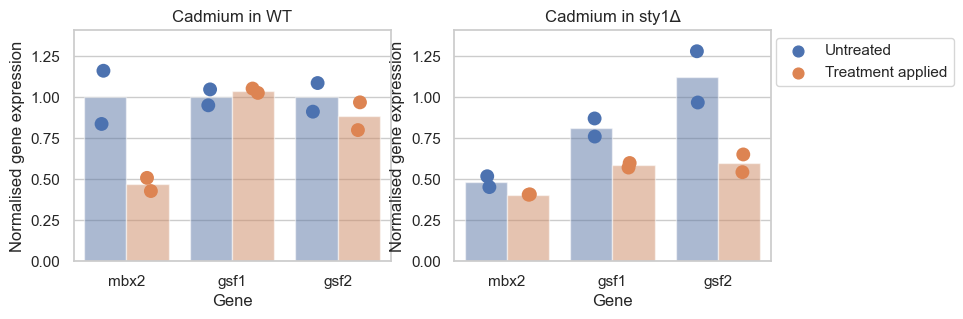

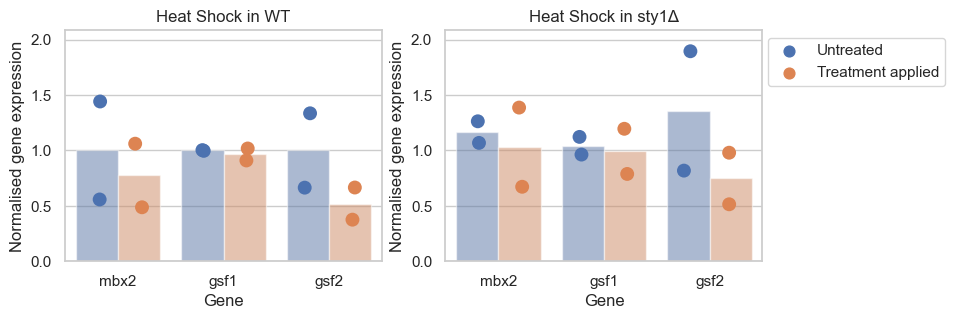

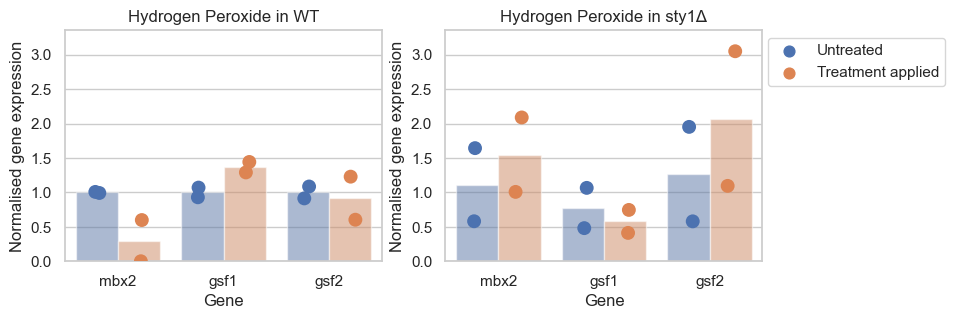

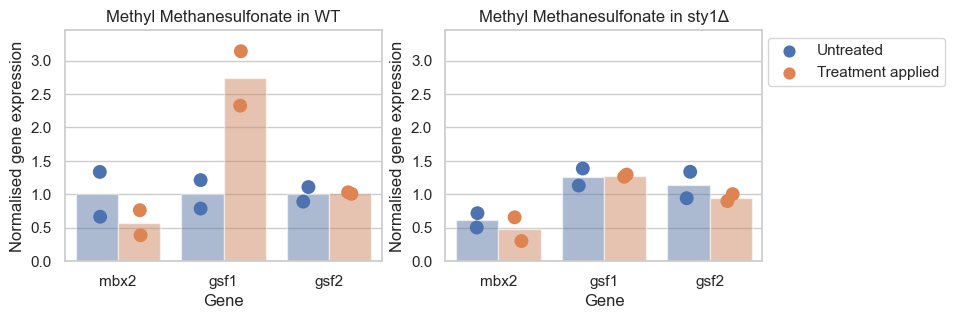

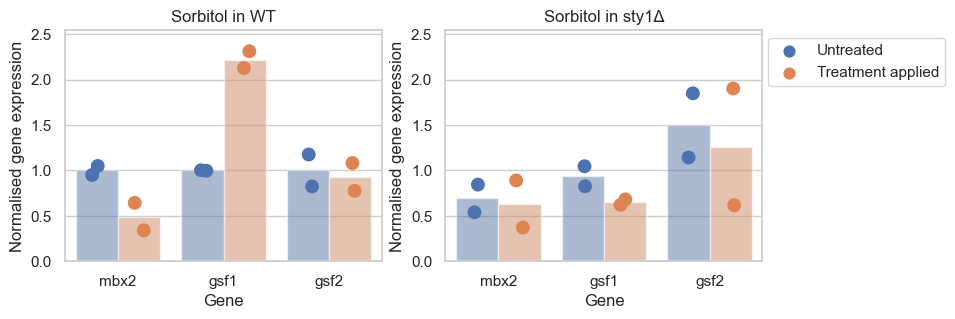

In [128]:
cols= ["SPBC317.01","SPBC15D4.02","SPCC1742.01","Genotype", "Treatment applied"]
names= ["mbx2", "gsf1", "gsf2"]
#create a sub_df with only the genes of interest
df_plot= df_final[df_final.columns[df_final.columns.isin(cols)]]
df_plot["Treatment"] = df_rna["Treatment"]
#add column called condition

for i in range(5):
      df_plot_temp= df_plot[df_plot["Treatment"]==df_plot["Treatment"].unique()[i]]
      
      #rename cols
      df_plot_temp = df_plot_temp.rename(columns={"SPBC317.01": "mbx2", "SPBC15D4.02": "gsf1", "SPCC1742.01": "gsf2"})
      #divide genes with average of wt treatment applied=0 and genotype=WT
      df_plot_temp["mbx2"] = df_plot_temp["mbx2"]/df_plot_temp[(df_plot_temp["Treatment applied"]=='Untreated') & (df_plot_temp["Genotype"]=="WT")]["mbx2"].mean()
      df_plot_temp["gsf1"] = df_plot_temp["gsf1"]/df_plot_temp[(df_plot_temp["Treatment applied"]=='Untreated') & (df_plot_temp["Genotype"]=="WT")]["gsf1"].mean()
      df_plot_temp["gsf2"] = df_plot_temp["gsf2"]/df_plot_temp[(df_plot_temp["Treatment applied"]=='Untreated') & (df_plot_temp["Genotype"]=="WT")]["gsf2"].mean()
      

      #melt but make sure you keep values in treatment applied
      df_plot_temp= pd.melt(df_plot_temp, id_vars=["Treatment", "Genotype","Treatment applied"], value_vars=["mbx2", "gsf1", "gsf2"])
      
      #rename value to normalised gene expression
      #and variable to gene
      df_plot_temp = df_plot_temp.rename(columns={"value": "Normalised gene expression", "variable": "Gene"})


      #create two sns barplots next to each other, split by genotype. Each should be a barplot overlaid by a stripplot
      fig,axis = plt.subplots(1,2, figsize=(9,3))
      #remove errorbar
      a= sns.barplot(x="Gene", y="Normalised gene expression", hue="Treatment applied", data=df_plot_temp[df_plot_temp["Genotype"]=="WT"], ax=axis[0], dodge=True, alpha=0.5, ci=None)
      a= sns.stripplot(x="Gene", y="Normalised gene expression", hue="Treatment applied", data=df_plot_temp[df_plot_temp["Genotype"]=="WT"], ax=axis[0], dodge=True, size=10)
      #title is treatment in genotype
      a.set_title(str(df_plot_temp["Treatment"].unique()[0]) + " in WT")
      #remove legend
      a.legend_.remove()
      #set y axis as max+10% for df_plot_temp
      a.set_ylim(0,df_plot_temp["Normalised gene expression"].max()*1.1)
      
      #match y axis for both plots
      b= sns.barplot(x="Gene", y="Normalised gene expression", hue="Treatment applied", data=df_plot_temp[df_plot_temp["Genotype"]=="sty1Δ"], ax=axis[1], dodge=True, alpha=0.5,ci=None)
      b= sns.stripplot(x="Gene", y="Normalised gene expression", hue="Treatment applied", data=df_plot_temp[df_plot_temp["Genotype"]=="sty1Δ"], ax=axis[1], dodge=True, size=10)
      b.set_title(str(df_plot_temp["Treatment"].unique()[0]) + " in sty1Δ")
      b.legend_.remove()
      b.set_ylim(0,df_plot_temp["Normalised gene expression"].max()*1.1)
      #add legend for treatment applied
      handles, labels = b.get_legend_handles_labels()
      b.legend(handles[:2], labels[:2], loc='upper right', bbox_to_anchor=(1.6, 1), ncol=1)

     
      

      




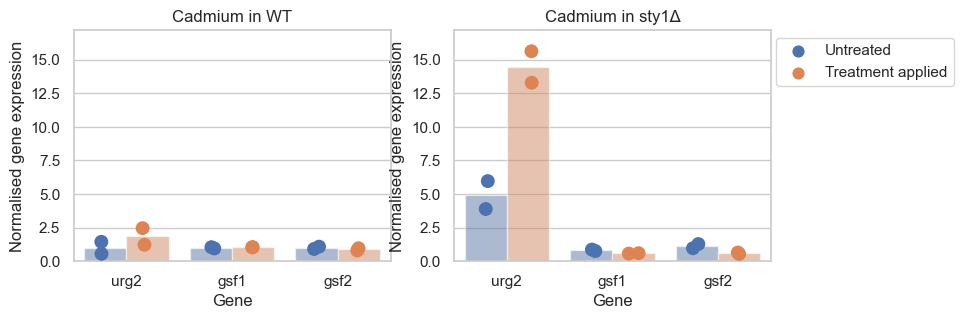

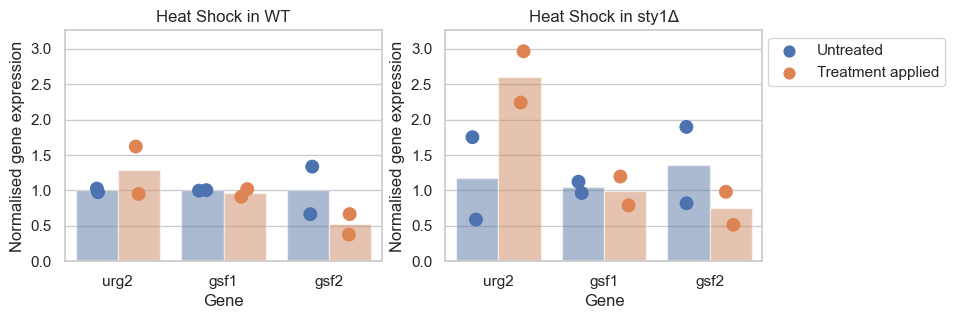

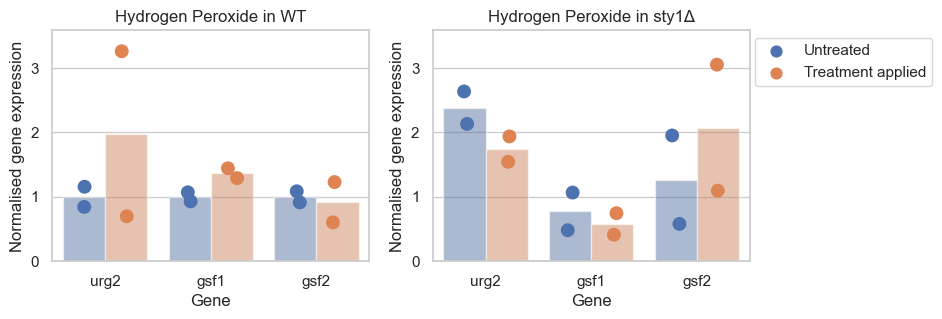

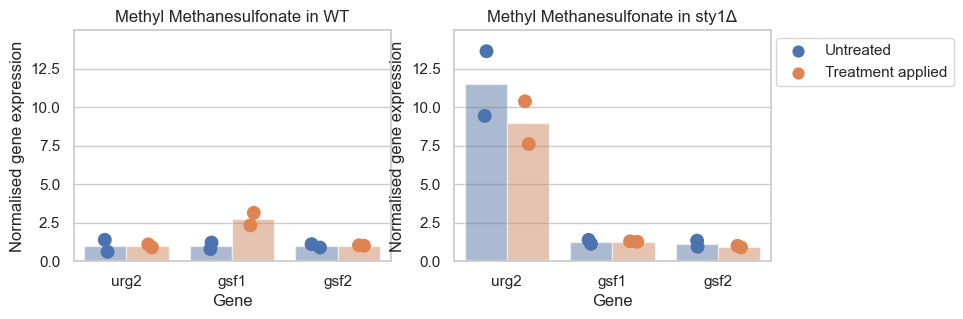

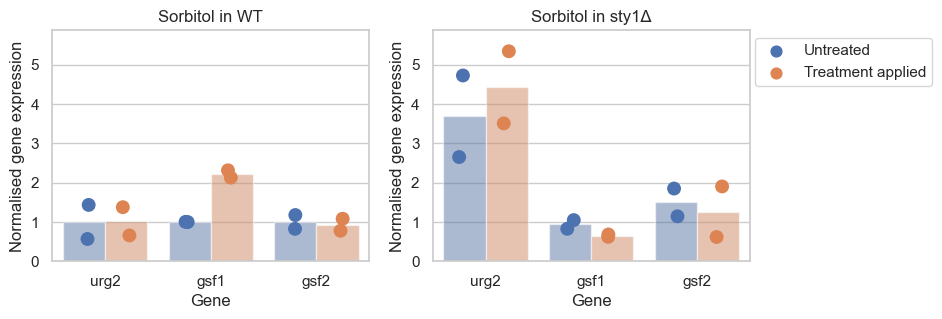

In [136]:
cols= ["SPAC1002.17c","SPBC15D4.02","SPCC1742.01","Genotype", "Treatment applied"]
names= ["urg2", "gsf1", "gsf2"]
#create a sub_df with only the genes of interest
df_plot= df_final[df_final.columns[df_final.columns.isin(cols)]]
df_plot["Treatment"] = df_rna["Treatment"]
#add column called condition

for i in range(5):
      df_plot_temp= df_plot[df_plot["Treatment"]==df_plot["Treatment"].unique()[i]]
      
      #rename cols
      df_plot_temp = df_plot_temp.rename(columns={"SPAC1002.17c": "urg2", "SPBC15D4.02": "gsf1", "SPCC1742.01": "gsf2"})
      #divide genes with average of wt treatment applied=0 and genotype=WT
      df_plot_temp["urg2"] = df_plot_temp["urg2"]/df_plot_temp[(df_plot_temp["Treatment applied"]=='Untreated') & (df_plot_temp["Genotype"]=="WT")]["urg2"].mean()
      df_plot_temp["gsf1"] = df_plot_temp["gsf1"]/df_plot_temp[(df_plot_temp["Treatment applied"]=='Untreated') & (df_plot_temp["Genotype"]=="WT")]["gsf1"].mean()
      df_plot_temp["gsf2"] = df_plot_temp["gsf2"]/df_plot_temp[(df_plot_temp["Treatment applied"]=='Untreated') & (df_plot_temp["Genotype"]=="WT")]["gsf2"].mean()
      

      #melt but make sure you keep values in treatment applied
      df_plot_temp= pd.melt(df_plot_temp, id_vars=["Treatment", "Genotype","Treatment applied"], value_vars=["urg2", "gsf1", "gsf2"])
      
      #rename value to normalised gene expression
      #and variable to gene
      df_plot_temp = df_plot_temp.rename(columns={"value": "Normalised gene expression", "variable": "Gene"})


      #create two sns barplots next to each other, split by genotype. Each should be a barplot overlaid by a stripplot
      fig,axis = plt.subplots(1,2, figsize=(9,3))
      #remove errorbar
      a= sns.barplot(x="Gene", y="Normalised gene expression", hue="Treatment applied", data=df_plot_temp[df_plot_temp["Genotype"]=="WT"], ax=axis[0], dodge=True, alpha=0.5, ci=None)
      a= sns.stripplot(x="Gene", y="Normalised gene expression", hue="Treatment applied", data=df_plot_temp[df_plot_temp["Genotype"]=="WT"], ax=axis[0], dodge=True, size=10)
      #title is treatment in genotype
      a.set_title(str(df_plot_temp["Treatment"].unique()[0]) + " in WT")
      #remove legend
      a.legend_.remove()
      #set y axis as max+10% for df_plot_temp
      a.set_ylim(0,df_plot_temp["Normalised gene expression"].max()*1.1)
      
      #match y axis for both plots
      b= sns.barplot(x="Gene", y="Normalised gene expression", hue="Treatment applied", data=df_plot_temp[df_plot_temp["Genotype"]=="sty1Δ"], ax=axis[1], dodge=True, alpha=0.5,ci=None)
      b= sns.stripplot(x="Gene", y="Normalised gene expression", hue="Treatment applied", data=df_plot_temp[df_plot_temp["Genotype"]=="sty1Δ"], ax=axis[1], dodge=True, size=10)
      b.set_title(str(df_plot_temp["Treatment"].unique()[0]) + " in sty1Δ")
      b.legend_.remove()
      b.set_ylim(0,df_plot_temp["Normalised gene expression"].max()*1.1)
      #add legend for treatment applied
      handles, labels = b.get_legend_handles_labels()
      b.legend(handles[:2], labels[:2], loc='upper right', bbox_to_anchor=(1.6, 1), ncol=1)

In [129]:
#remove rows with eIF2α (s52a)
df_final_rpf = df_final_rpf[df_final_rpf['Genotype'] != 'eIF2α (s52a)']
df_rpf = df_final_rpf[df_final_rpf['Genotype'] != 'eIF2α (s52a)']
#reset
df_final_rpf = df_final_rpf.reset_index(drop=True)
df_rpf=df_rpf.reset_index(drop=True)

#Treatment applied to True/False
df_final_rpf['Treatment applied'] = df_final_rpf['Treatment applied'].astype(bool)
#change true to Treatment applied and false to Untreated
df_final_rpf['Treatment applied'] = df_final_rpf['Treatment applied'].replace({True: 'Treatment applied', False: 'Untreated'})

In [130]:
df_rpf

,SPAC1002.01,SPAC1002.02,SPAC1002.03c,SPAC1002.04c,SPAC1002.05c,SPAC1002.06c,SPAC1002.07c,SPAC1002.08c,SPAC1002.09c,SPAC1002.10c,...,SPMIT.10,SPMIT.11,SPMTR.01,SPMTR.02,SPMTR.03,SPMTR.04,Genotype,Time,Replicate,Treatment applied
0,40.734676,164.975439,1281.614753,112.529543,18.839788,1.018367,410.911047,19.858155,1478.668750,70.267317,...,439.425321,177.705025,0.0,0.000000,0.000000,59.574464,WT,15min,rep1,0
1,34.675248,142.312997,1313.325020,104.025744,15.170421,0.000000,603.927237,30.340842,1891.245821,57.792080,...,489.065478,170.486636,0.0,0.000000,0.000000,44.788862,sty1Δ,15min,rep1,0
2,37.984067,310.939339,895.717300,314.472740,60.951177,8.833504,426.658240,15.016957,1503.462371,44.167520,...,547.677244,277.372024,0.0,0.000000,0.000000,98.935244,WT,15min,rep1,1
3,43.711318,221.678827,1078.732883,187.334220,28.100133,4.683355,613.519570,18.733422,2013.842864,37.466844,...,468.335550,226.362182,0.0,0.000000,0.000000,84.300399,sty1Δ,15min,rep1,1
4,36.324733,139.795185,1174.499706,145.298933,33.022485,2.201499,451.307291,29.720236,1481.608813,63.843470,...,171.716920,73.750216,0.0,0.000000,0.000000,56.138224,WT,15min,rep2,0
5,49.371406,161.106694,1093.966420,128.625505,14.291723,0.000000,766.556042,35.079683,2034.621631,62.363881,...,280.637466,70.159367,0.0,0.000000,0.000000,90.947327,sty1Δ,15min,rep2,0
6,40.554459,302.468673,1008.792165,388.646898,67.590765,11.828384,500.171660,16.897691,1595.142050,57.452150,...,258.534676,136.871299,0.0,1.689769,0.000000,89.557763,WT,15min,rep2,1
7,44.353350,264.104037,1008.030674,199.590074,18.144552,4.032123,705.621472,28.224859,1826.551582,38.305166,...,252.007669,88.706699,0.0,0.000000,0.000000,118.947620,sty1Δ,15min,rep2,1
8,38.164107,154.969406,741.887119,125.478959,21.395030,1.156488,433.104795,29.490447,1573.980310,60.715625,...,15.034345,13.299613,0.0,0.000000,0.578244,53.776697,WT,15min,rep1,0
9,35.908509,236.098447,812.430019,114.009516,18.851967,0.000000,617.626357,31.419945,2150.919696,60.146753,...,3.590851,7.181702,0.0,0.000000,0.897713,96.055262,sty1Δ,15min,rep1,0


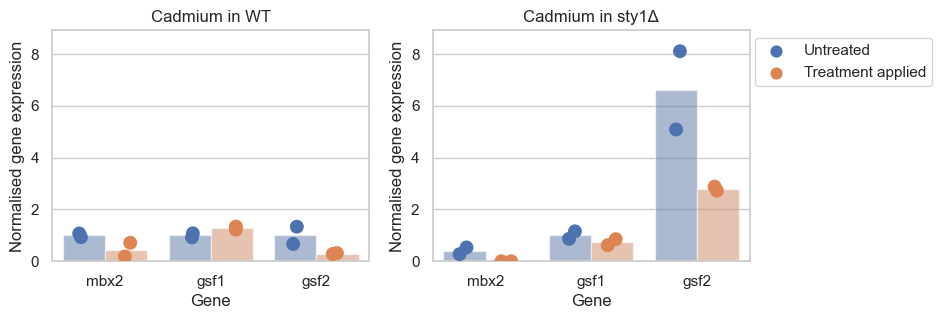

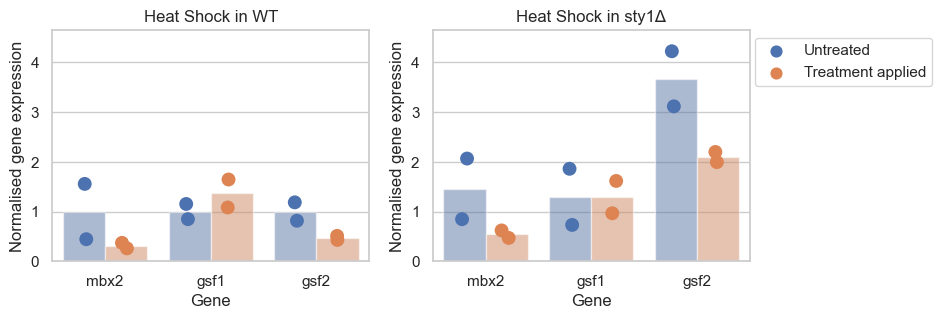

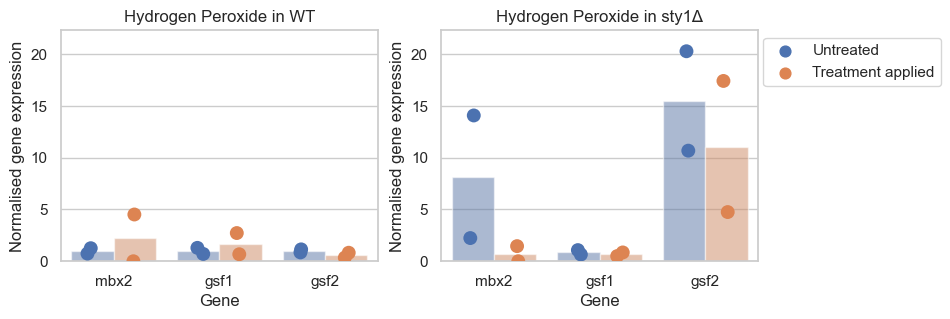

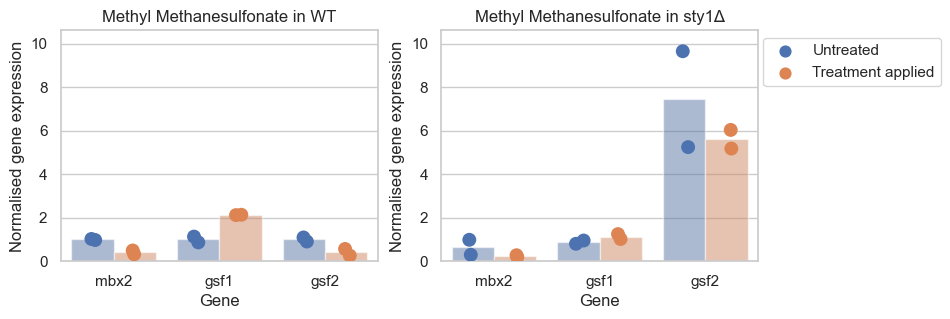

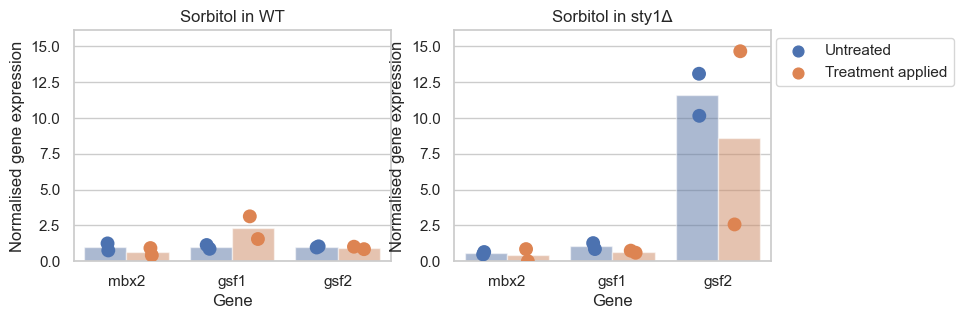

In [131]:
cols= ["SPBC317.01","SPBC15D4.02","SPCC1742.01","Genotype", "Treatment applied"]
names= ["mbx2", "gsf1", "gsf2"]
#create a sub_df with only the genes of interest
df_plot= df_final_rpf[df_final_rpf.columns[df_final_rpf.columns.isin(cols)]]
df_plot["Treatment"] = df_rna["Treatment"]
#add column called condition

for i in range(5):
      df_plot_temp= df_plot[df_plot["Treatment"]==df_plot["Treatment"].unique()[i]]
      
      #rename cols
      df_plot_temp = df_plot_temp.rename(columns={"SPBC317.01": "mbx2", "SPBC15D4.02": "gsf1", "SPCC1742.01": "gsf2"})
      #reove nans
      #remove inf 
      df_plot_temp = df_plot_temp.replace([np.inf, -np.inf], np.nan)
      df_plot_temp = df_plot_temp.dropna()

      #divide genes with average of wt treatment applied=0 and genotype=WT
      df_plot_temp["mbx2"] = df_plot_temp["mbx2"]/df_plot_temp[(df_plot_temp["Treatment applied"]=='Untreated') & (df_plot_temp["Genotype"]=="WT")]["mbx2"].mean()
      df_plot_temp["gsf1"] = df_plot_temp["gsf1"]/df_plot_temp[(df_plot_temp["Treatment applied"]=='Untreated') & (df_plot_temp["Genotype"]=="WT")]["gsf1"].mean()
      df_plot_temp["gsf2"] = df_plot_temp["gsf2"]/df_plot_temp[(df_plot_temp["Treatment applied"]=='Untreated') & (df_plot_temp["Genotype"]=="WT")]["gsf2"].mean()
      

      #melt but make sure you keep values in treatment applied
      df_plot_temp= pd.melt(df_plot_temp, id_vars=["Treatment", "Genotype","Treatment applied"], value_vars=["mbx2", "gsf1", "gsf2"])
      
      #rename value to normalised gene expression
      #and variable to gene
      df_plot_temp = df_plot_temp.rename(columns={"value": "Normalised gene expression", "variable": "Gene"})
#remov inf 
      


      #create two sns barplots next to each other, split by genotype. Each should be a barplot overlaid by a stripplot
      fig,axis = plt.subplots(1,2, figsize=(9,3))
      #remove errorbar
      a= sns.barplot(x="Gene", y="Normalised gene expression", hue="Treatment applied", data=df_plot_temp[df_plot_temp["Genotype"]=="WT"], ax=axis[0], dodge=True, alpha=0.5, ci=None)
      a= sns.stripplot(x="Gene", y="Normalised gene expression", hue="Treatment applied", data=df_plot_temp[df_plot_temp["Genotype"]=="WT"], ax=axis[0], dodge=True, size=10)
      #title is treatment in genotype
      a.set_title(str(df_plot_temp["Treatment"].unique()[0]) + " in WT")
      #remove legend
      a.legend_.remove()
      #set y axis as max+10% for df_plot_temp
      a.set_ylim(0,df_plot_temp["Normalised gene expression"].max()*1.1)
      
      #match y axis for both plots
      b= sns.barplot(x="Gene", y="Normalised gene expression", hue="Treatment applied", data=df_plot_temp[df_plot_temp["Genotype"]=="sty1Δ"], ax=axis[1], dodge=True, alpha=0.5,ci=None)
      b= sns.stripplot(x="Gene", y="Normalised gene expression", hue="Treatment applied", data=df_plot_temp[df_plot_temp["Genotype"]=="sty1Δ"], ax=axis[1], dodge=True, size=10)
      b.set_title(str(df_plot_temp["Treatment"].unique()[0]) + " in sty1Δ")
      b.legend_.remove()
      b.set_ylim(0,df_plot_temp["Normalised gene expression"].max()*1.1)
      #add legend for treatment applied
      handles, labels = b.get_legend_handles_labels()
      b.legend(handles[:2], labels[:2], loc='upper right', bbox_to_anchor=(1.6, 1), ncol=1)

In [132]:
#barplot of row totals in df_rpf
df_final_rpf["Total"] =  df_final_rpf.sum(axis=1)
plt.bar( df_rpf["Sample"],  df_final_rpf["Total"])

KeyError: 'Sample'

In [ ]:

def plot_genes(genes):
    fig, axs = plt.subplots(5, 1, figsize=(10, 20), sharex=False, sharey=False)
    sns.set_theme(style="whitegrid")
    sns.set_context("paper", font_scale=1.5)
    sns.despine(left=True)
    sub_df = df_final[df_final.columns[df_final.columns.isin(genes)]]
    
    for i in range(5):
        
        #Use [i*12:(i+1)*12, :] to plot the genes mentioned in the genes list
        sns.barplot(x="Genotype", y=gene, hue="Treatment applied", data=df_final.iloc[i*12:(i+1)*12, :], ax=axs[i], dodge=True)
        sns.stripplot(x="Genotype", y=gene, hue="Treatment applied", data=df_final.iloc[i*12:(i+1)*12, :], ax=axs[i], dodge=True)
        axs[i].set_title(["Cadmium", "Heat Shock", "Hydrogen Peroxide", "Methyl Methanesulfonate", "Sorbitol"][i])
        #genotype labels as small, and treatment as large
    
        axs[i].set_xlabel("")
        axs[i].set_ylabel(gene)
   #recreate legend to something saying Untreated and Treated, with blue and orange colors and glyphs or circles
        handles, labels = axs[i].get_legend_handles_labels()
    #remove legend
        axs[i].get_legend().remove()
        if i ==0:
            axs[i].legend(handles=handles, labels=["Untreated", "Treated"], title="Treatment applied", loc='upper right')
    plt.show()
    
    




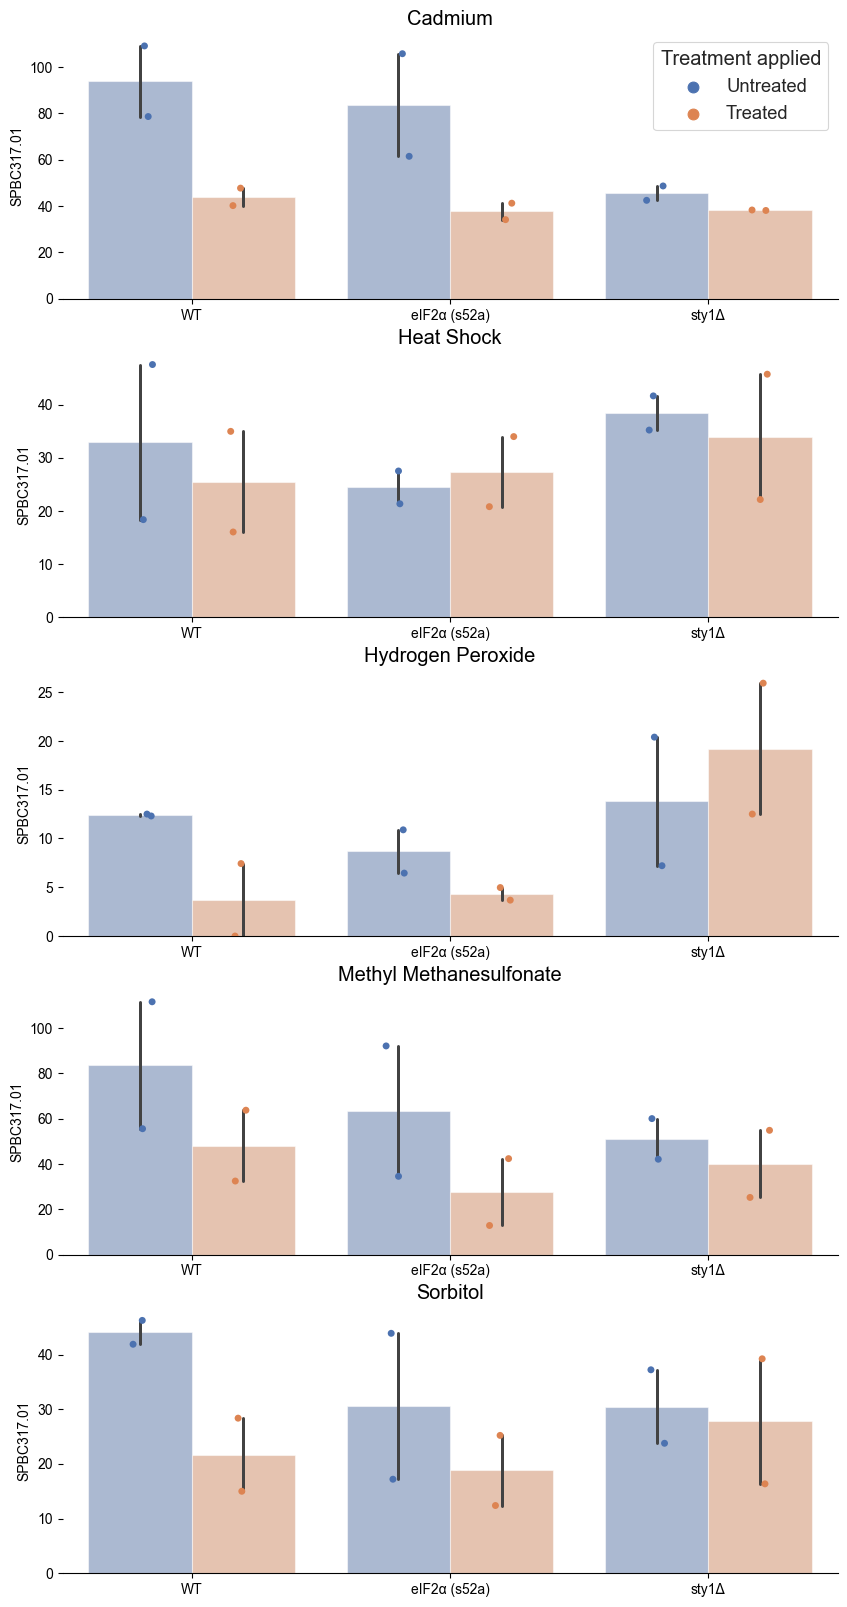

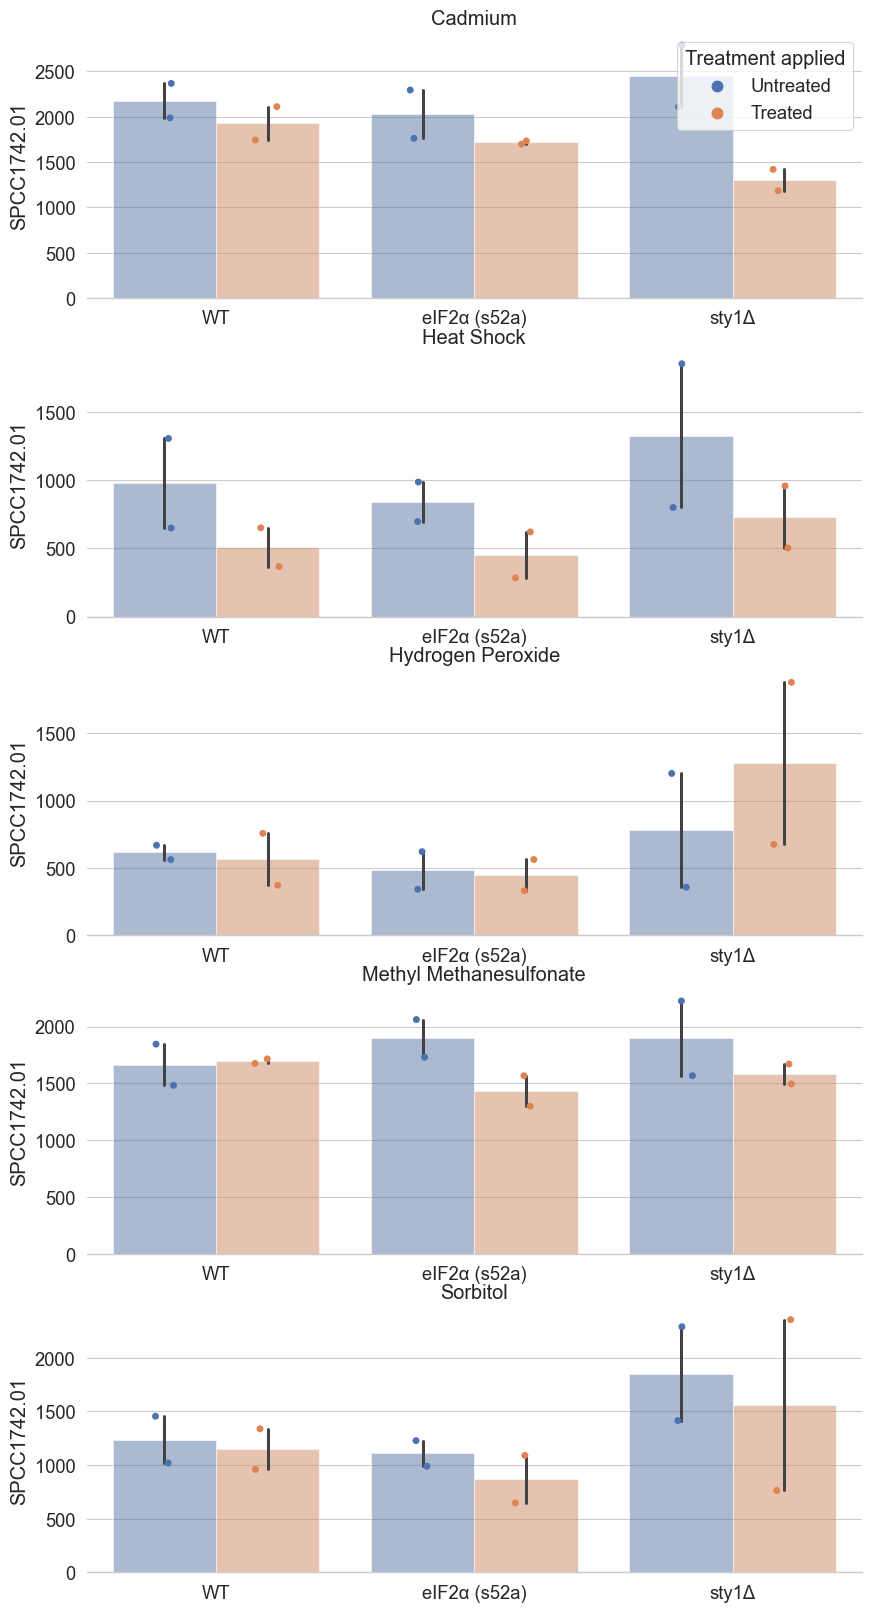

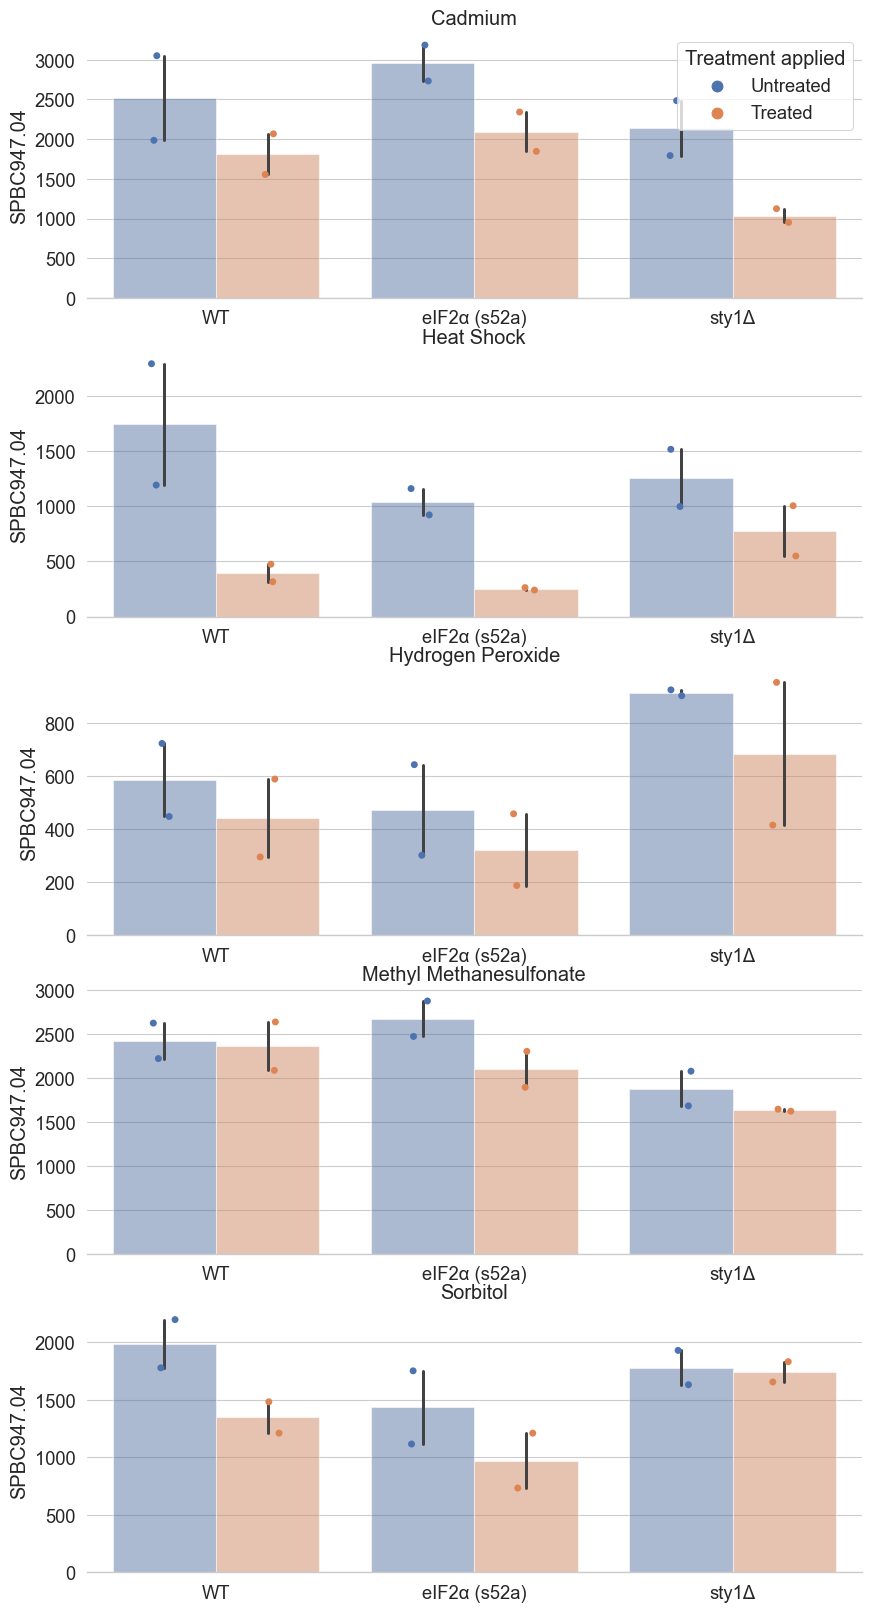

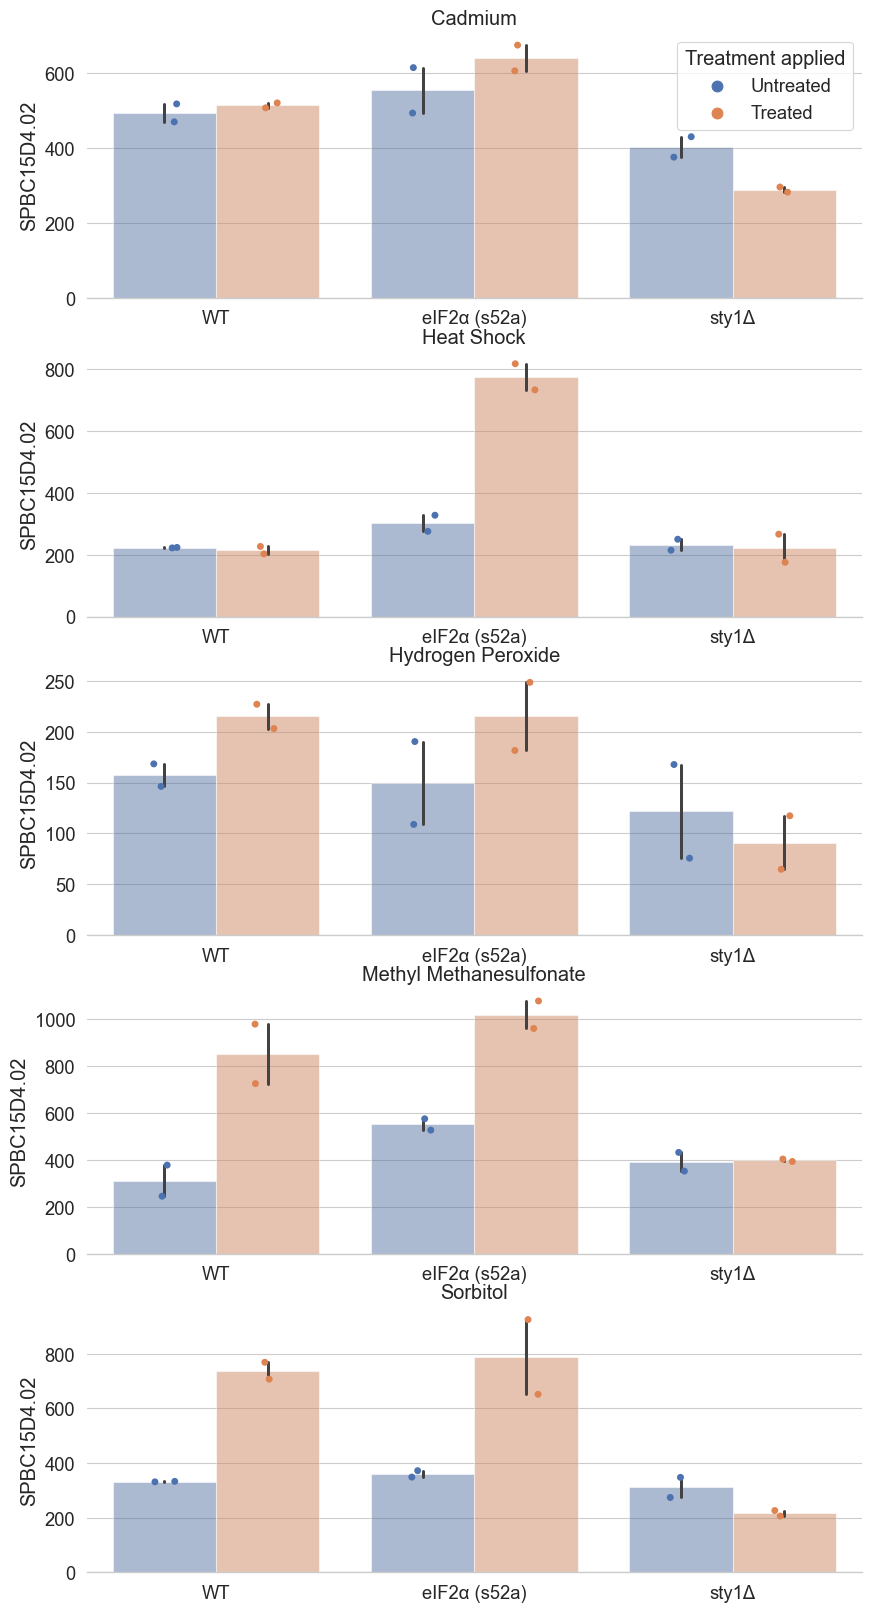

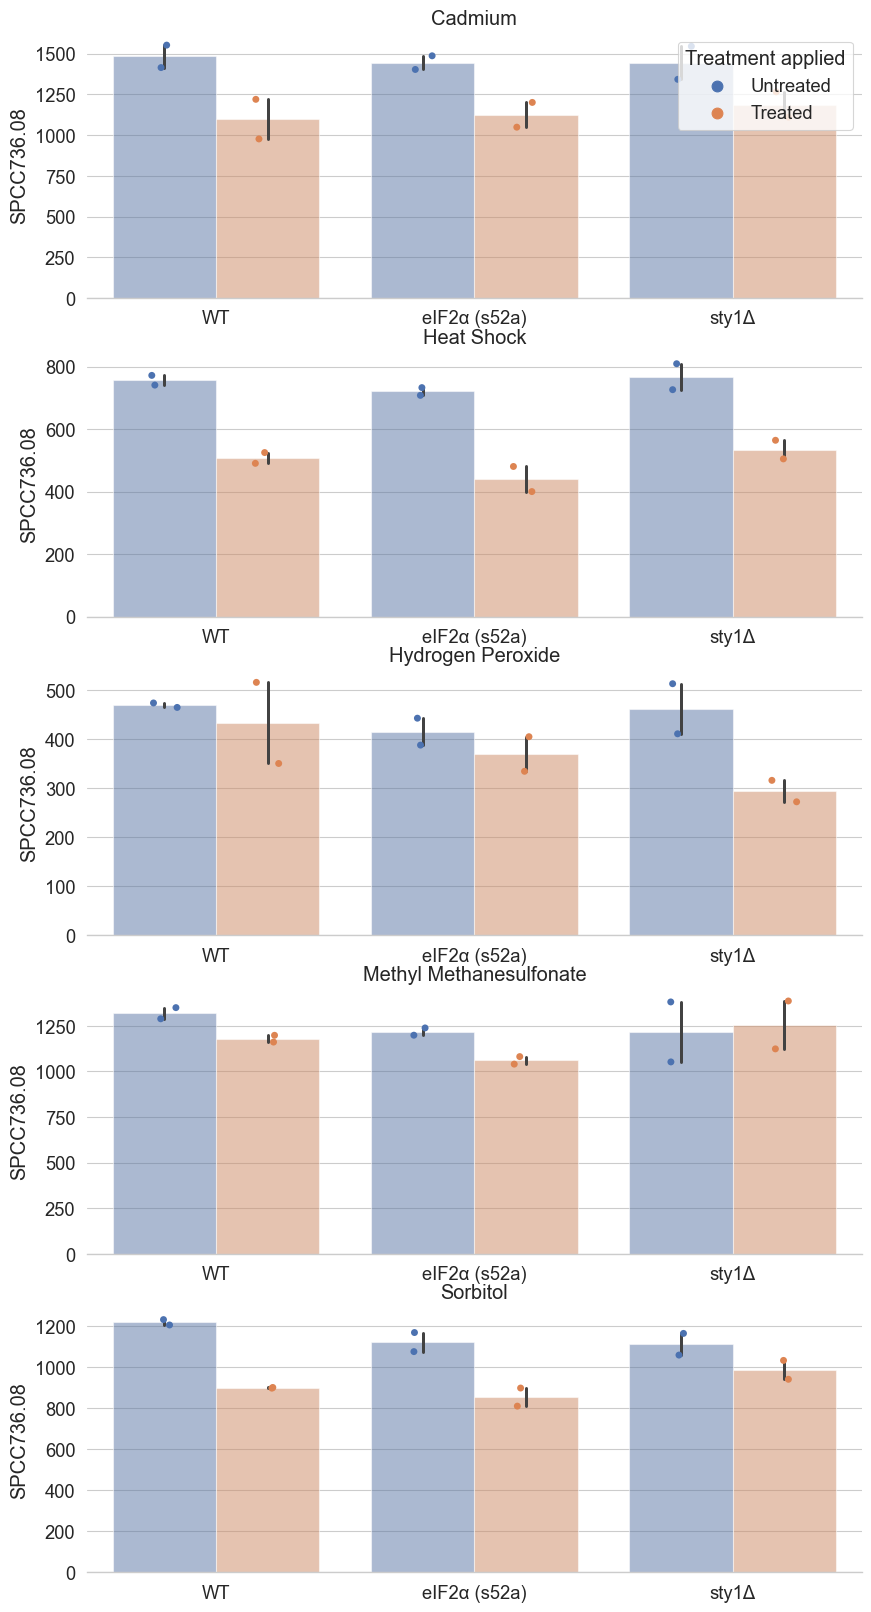

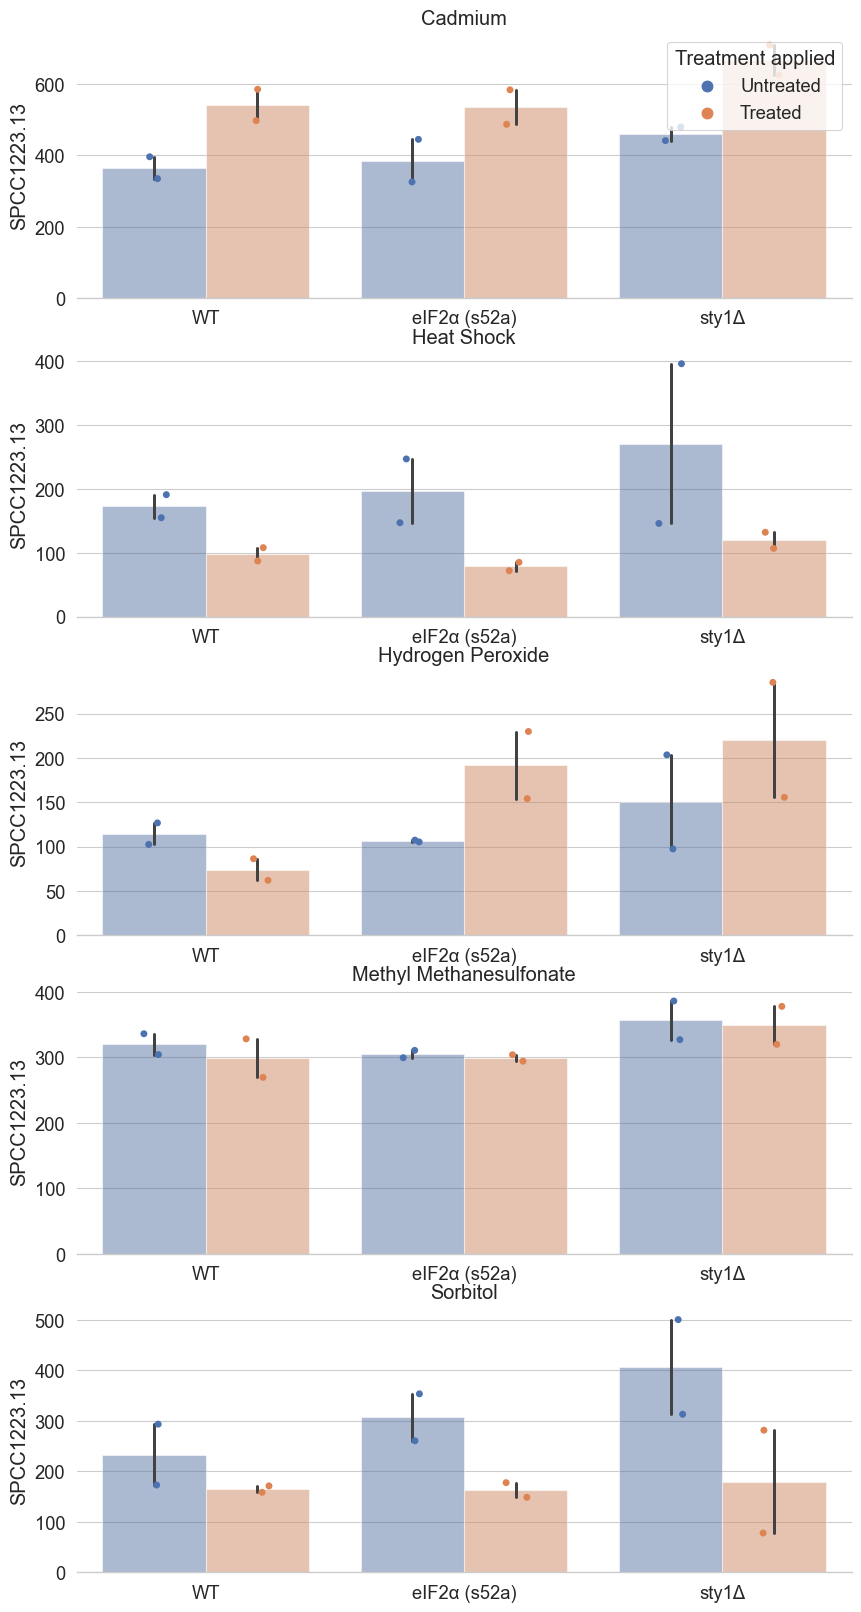

In [ ]:
#plot mbx2
plot_gene("SPBC317.01")
#gsf2
plot_gene("SPCC1742.01")
#plf3 SPBC947.04
plot_gene("SPBC947.04")
#gsf1 SPBC15D4.02
plot_gene("SPBC15D4.02")
#cbf11 SPCC736.08
plot_gene("SPCC736.08")
#cbf12 SPCC1223.13
plot_gene("SPCC1223.13")


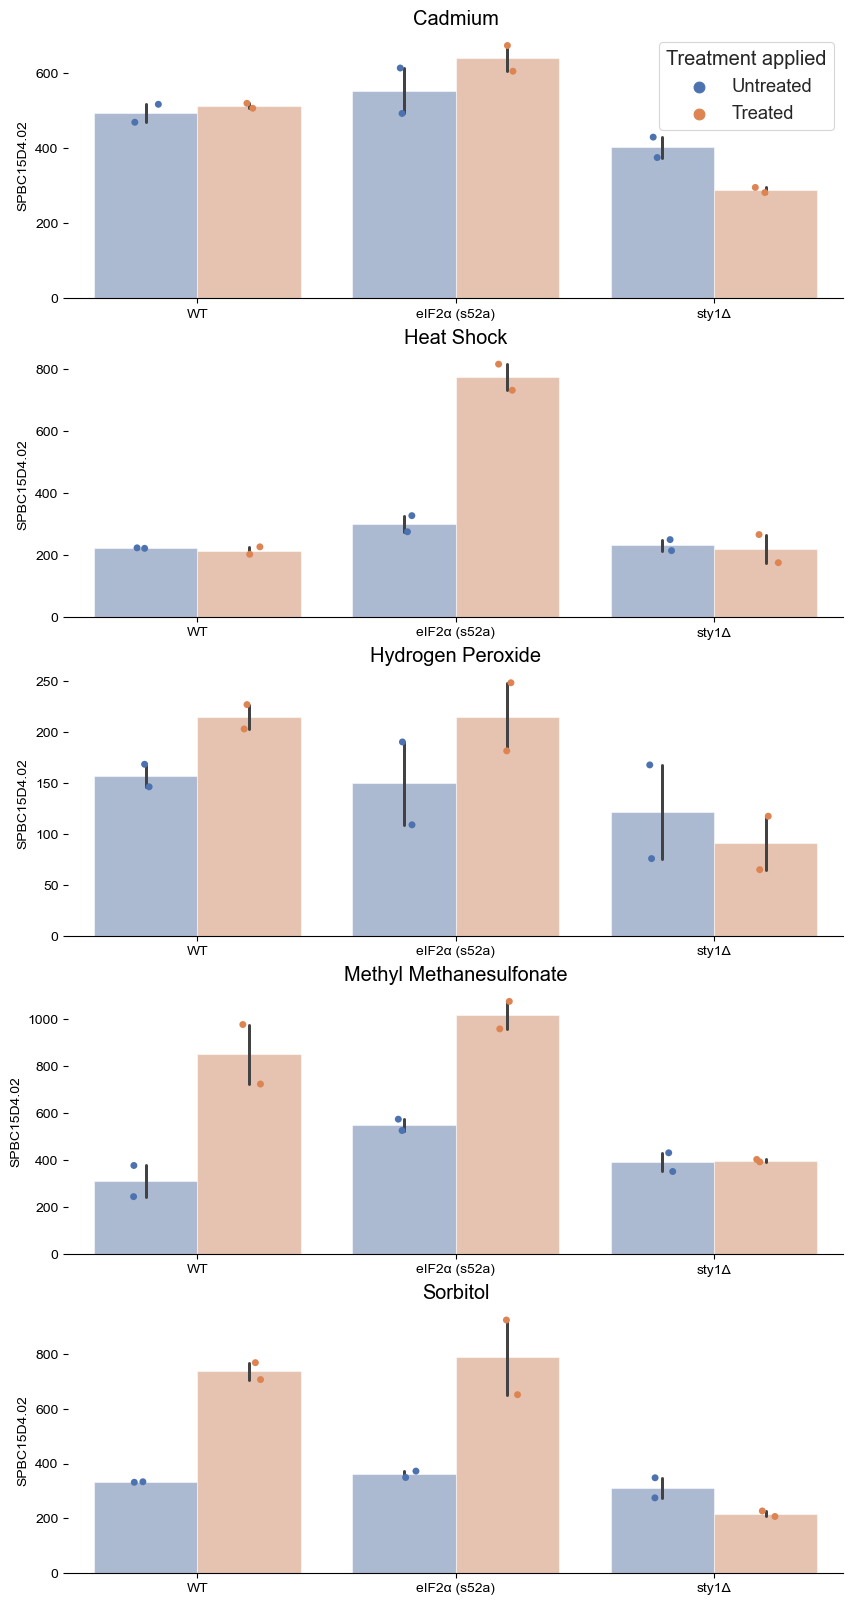

In [ ]:
#gsf1 SPBC15D4.02
plot_gene("SPBC15D4.02")

In [ ]:
#repeat for rpf data
for i in [df_rpf]:
      df_temp = i.drop(i.columns[0], axis=1)
      #save last 4 columns 
      saved = df_temp.iloc[:, -4:]
      df_temp = df_temp.drop(df_temp.columns[-5:], axis=1)
      df_temp = df_temp.transpose()
      #split up in batches
      df_temp1 = df_temp.iloc[:, :12]
      df_temp2 = df_temp.iloc[:, 12:24]
      df_temp3 = df_temp.iloc[:, 24:36]
      df_temp4 = df_temp.iloc[:, 36:48]
      df_temp5 = df_temp.iloc[:, 48:60]
      for j,k in enumerate([df_temp1, df_temp2, df_temp3, df_temp4, df_temp5]):
            row_means = np.exp(np.mean(np.log(k+1),axis=1))
            i_ = k/row_means[:,None]
            col_medians = np.median(i_,axis=0)
            k = k/col_medians
            if j==0:
                  df_final = k
            else:
                  df_final = pd.concat([df_final, k], axis=1)
                  
      df_final = df_final.transpose()
      df_final = pd.concat([df_final, saved], axis=1)


,SPAC1002.01,SPAC1002.02,SPAC1002.03c,SPAC1002.04c,SPAC1002.05c,SPAC1002.06c,SPAC1002.07c,SPAC1002.08c,SPAC1002.09c,SPAC1002.10c,...,SPMIT.10,SPMIT.11,SPMTR.01,SPMTR.02,SPMTR.03,SPMTR.04,Genotype,Time,Replicate,Treatment applied
0,40.734676,164.975439,1281.614753,112.529543,18.839788,1.018367,410.911047,19.858155,1478.668750,70.267317,...,439.425321,177.705025,0.0,0.000000,0.000000,59.574464,WT,15min,rep1,0
1,34.287821,126.643725,1067.346676,105.075580,22.674204,0.553029,446.294698,29.310556,1620.929071,64.704436,...,472.287078,210.704188,0.0,0.000000,0.000000,60.280201,eIF2α (s52a),15min,rep1,0
2,34.675248,142.312997,1313.325020,104.025744,15.170421,0.000000,603.927237,30.340842,1891.245821,57.792080,...,489.065478,170.486636,0.0,0.000000,0.000000,44.788862,sty1Δ,15min,rep1,0
3,37.984067,310.939339,895.717300,314.472740,60.951177,8.833504,426.658240,15.016957,1503.462371,44.167520,...,547.677244,277.372024,0.0,0.000000,0.000000,98.935244,WT,15min,rep1,1
4,28.629152,214.284867,1027.179280,290.629272,54.655654,6.940401,414.688932,18.218551,1266.623098,59.860955,...,405.145881,296.702123,0.0,0.000000,0.000000,94.562957,eIF2α (s52a),15min,rep1,1
5,43.711318,221.678827,1078.732883,187.334220,28.100133,4.683355,613.519570,18.733422,2013.842864,37.466844,...,468.335550,226.362182,0.0,0.000000,0.000000,84.300399,sty1Δ,15min,rep1,1
6,36.324733,139.795185,1174.499706,145.298933,33.022485,2.201499,451.307291,29.720236,1481.608813,63.843470,...,171.716920,73.750216,0.0,0.000000,0.000000,56.138224,WT,15min,rep2,0
7,43.850508,135.283482,1113.989502,148.345336,19.592780,0.000000,487.020536,24.257728,1713.901771,67.175246,...,222.051509,92.365964,0.0,0.000000,0.000000,66.242257,eIF2α (s52a),15min,rep2,0
8,49.371406,161.106694,1093.966420,128.625505,14.291723,0.000000,766.556042,35.079683,2034.621631,62.363881,...,280.637466,70.159367,0.0,0.000000,0.000000,90.947327,sty1Δ,15min,rep2,0
9,40.554459,302.468673,1008.792165,388.646898,67.590765,11.828384,500.171660,16.897691,1595.142050,57.452150,...,258.534676,136.871299,0.0,1.689769,0.000000,89.557763,WT,15min,rep2,1


In [ ]:
#plot row sums from df_final after creating a temp df with reset index
temp_df = df_final.reset_index(drop=True)
temp_df["row_sum"] = temp_df.iloc[:, 0:12].sum(axis=1)
temp_df["row_sum"] 


0     4080.596199
1     3907.152470
2     4539.567892
3     4246.265345
4     3887.491851
5     4686.477735
6     4043.052876
7     4186.324033
8     4750.048967
9     4608.000393
10    4256.437661
11    4542.186218
12    3591.473809
13    3797.214226
14    4469.711672
15    6592.106780
16    6076.907542
17    6977.852473
18    3970.214144
19    3749.862155
20    3965.549297
21    7073.581764
22    5101.655750
23    6654.973635
24    1815.154898
25    1585.590881
26    1821.366847
27    1851.118723
28    1502.429581
29    2259.232256
30    1493.214139
31    1671.736092
32    1888.061746
33    1944.671752
34    1773.398322
35    2682.533133
36    3532.960753
37    3432.006283
38    4035.260323
39    3664.367512
40    3321.631698
41    4003.867995
42    3154.054736
43    3390.669787
44    3792.229944
45    3195.951882
46    3482.778888
47    3800.118506
48    2741.682726
49    2770.396256
50    3104.304549
51    3123.397294
52    3237.366841
53    5164.858470
54    2504.359182
55    2648

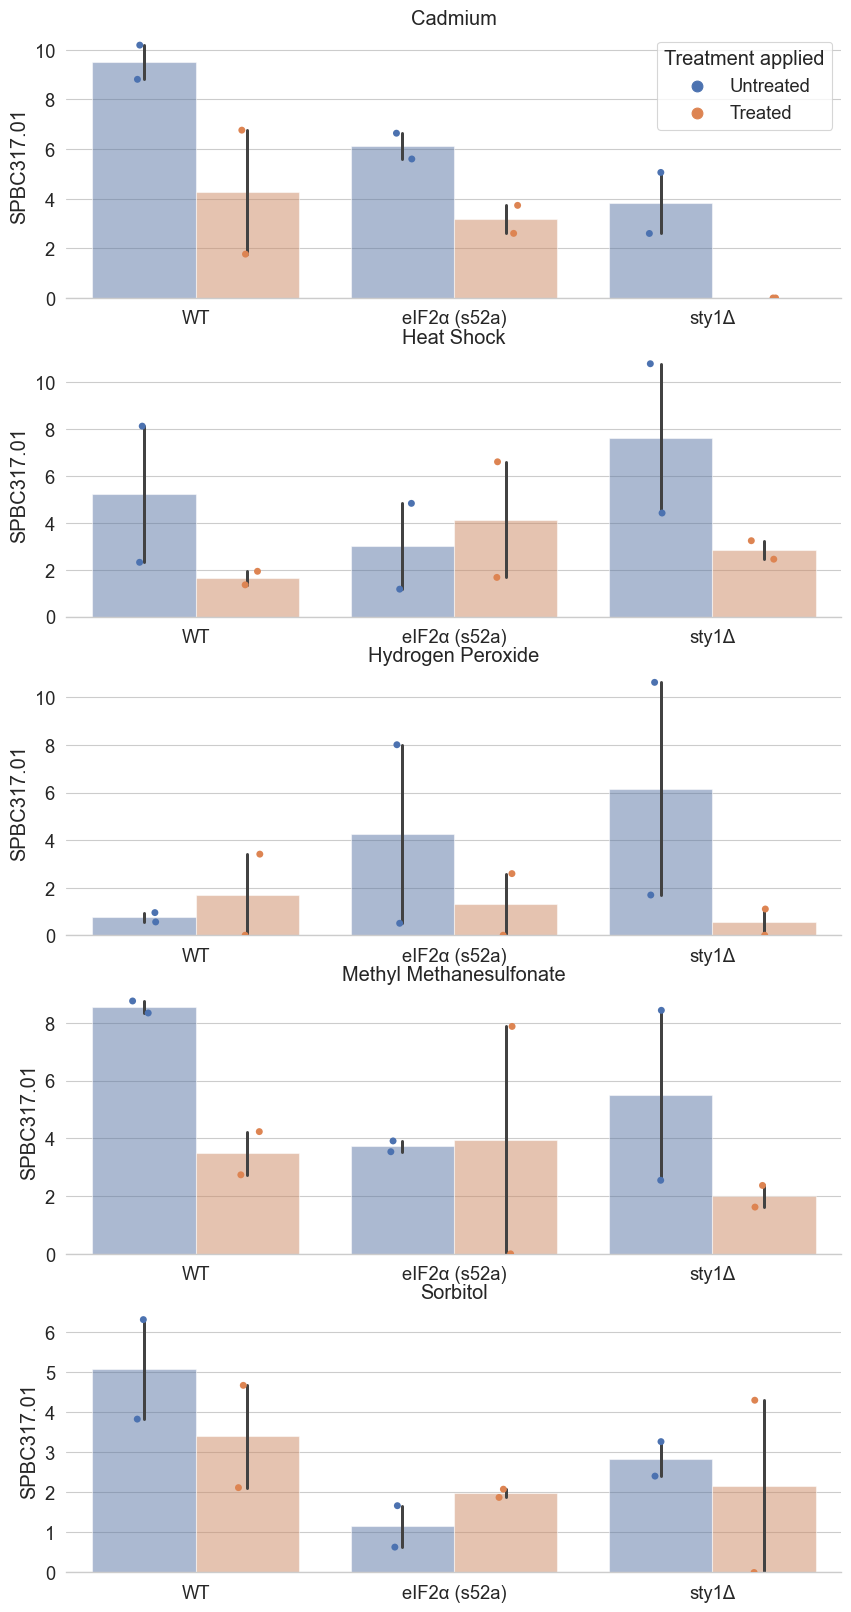

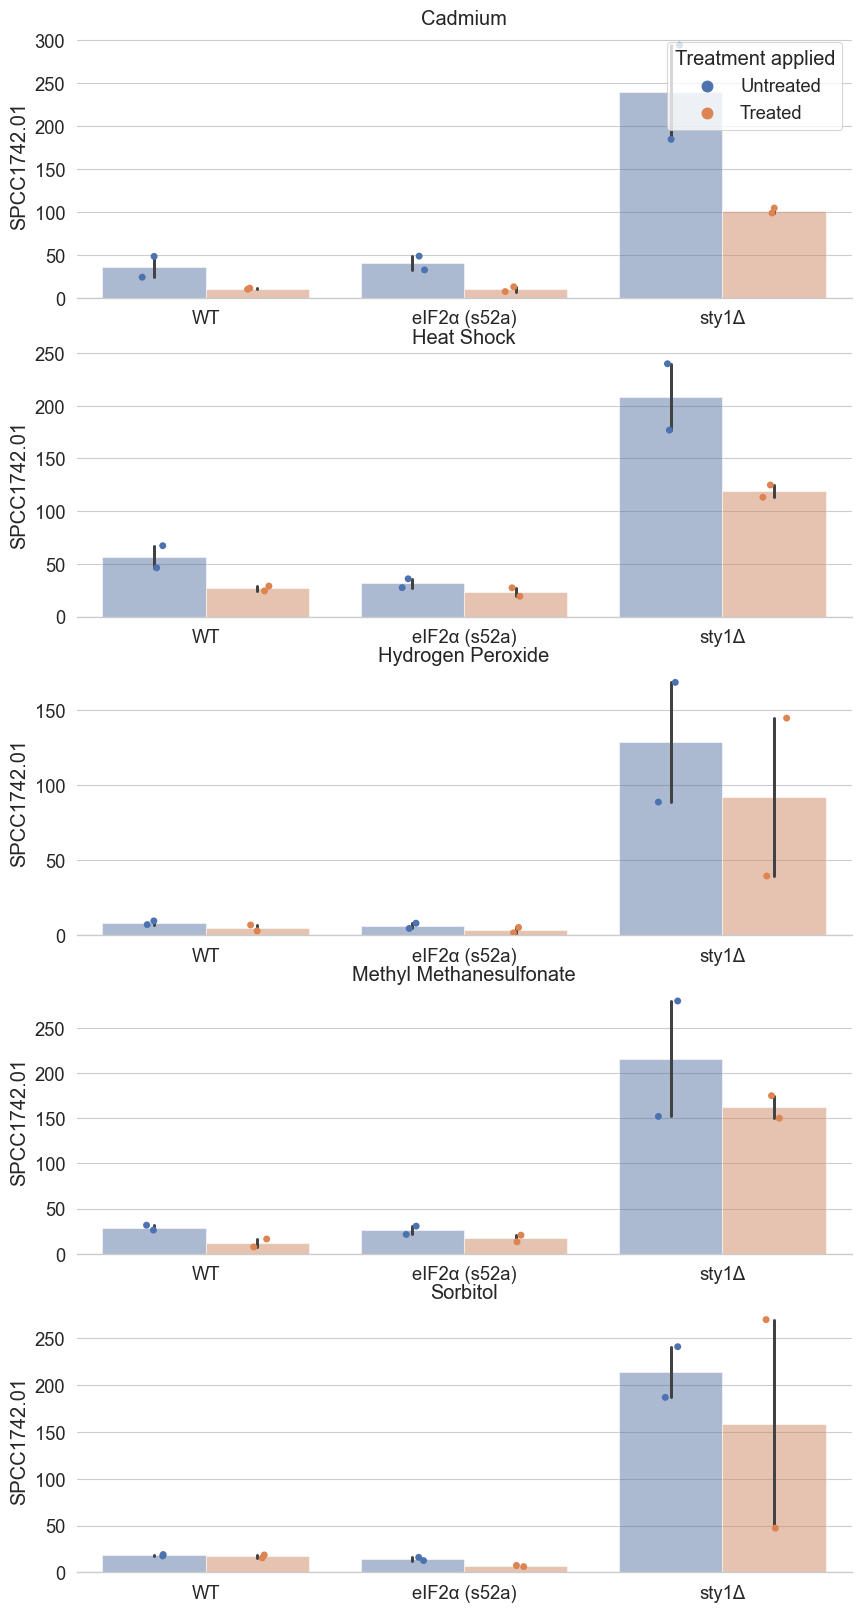

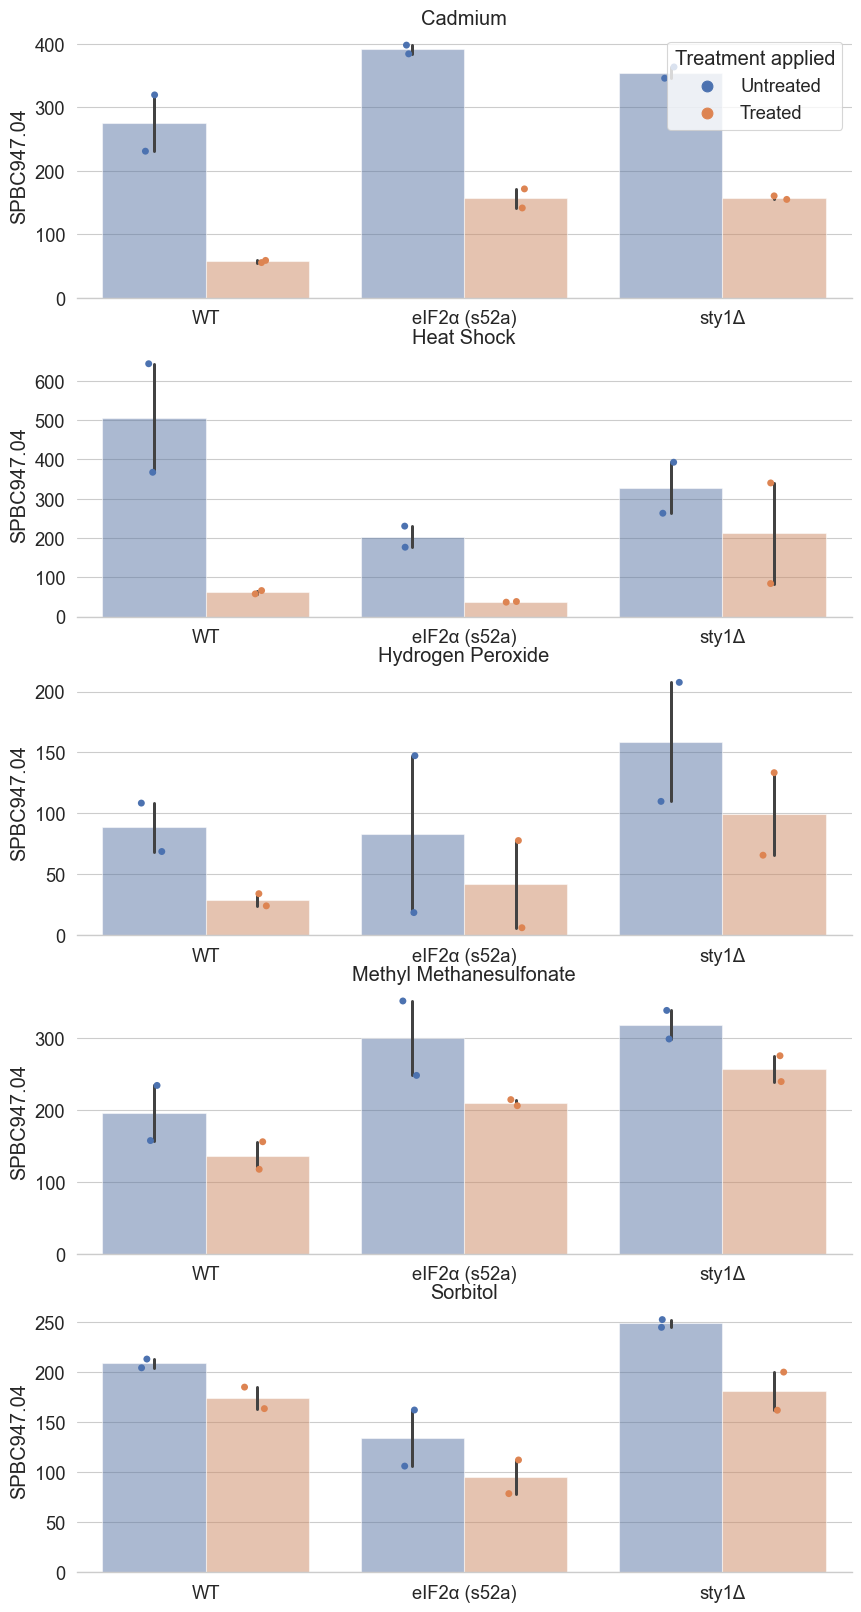

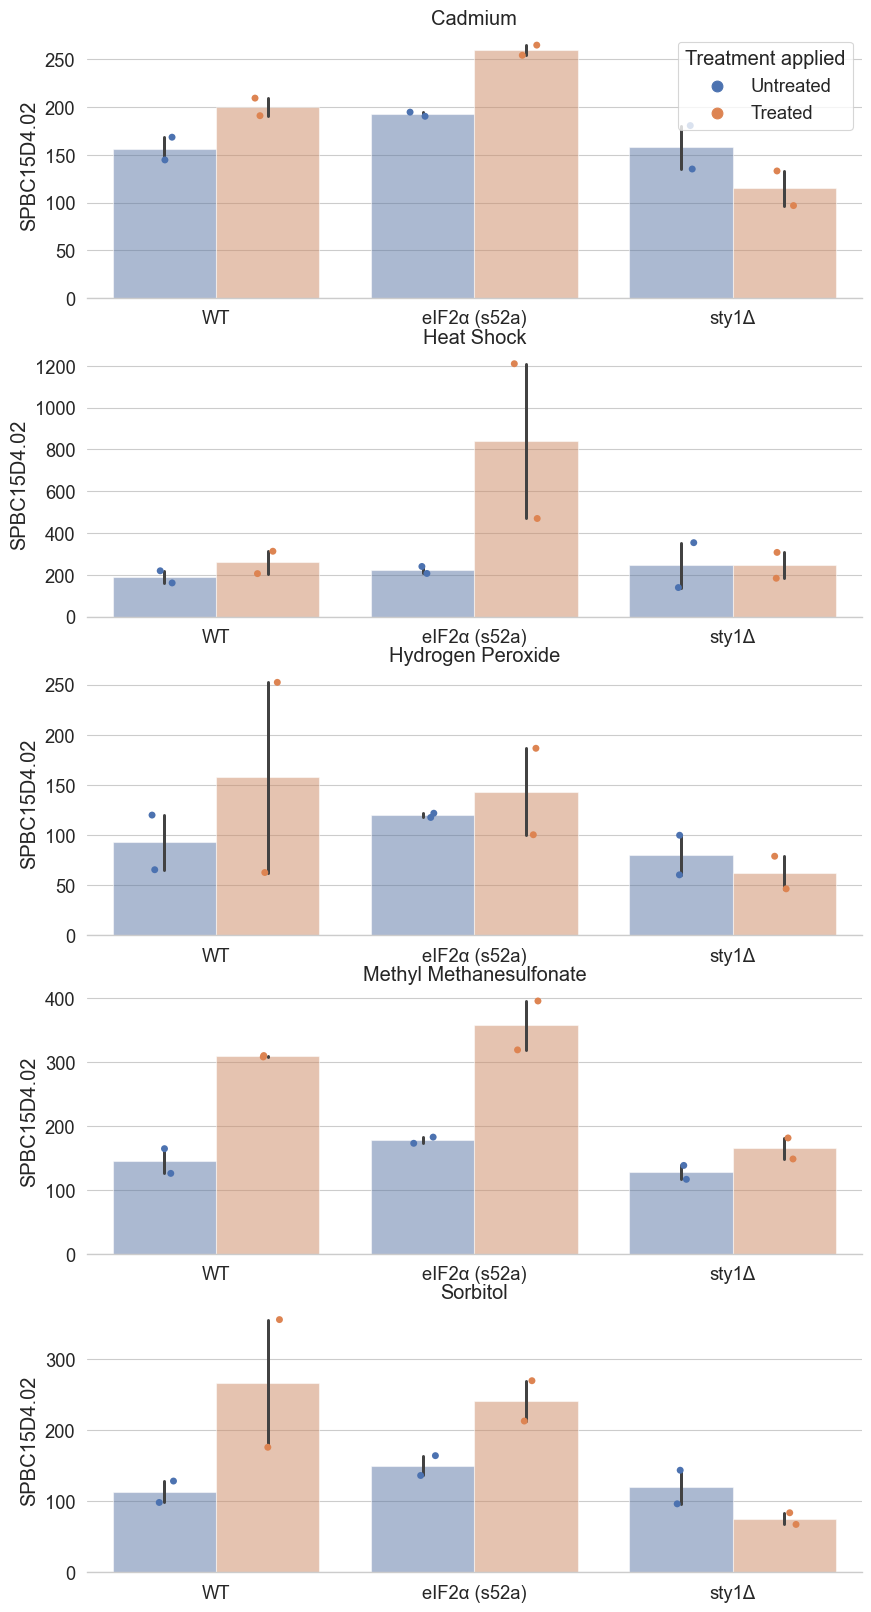

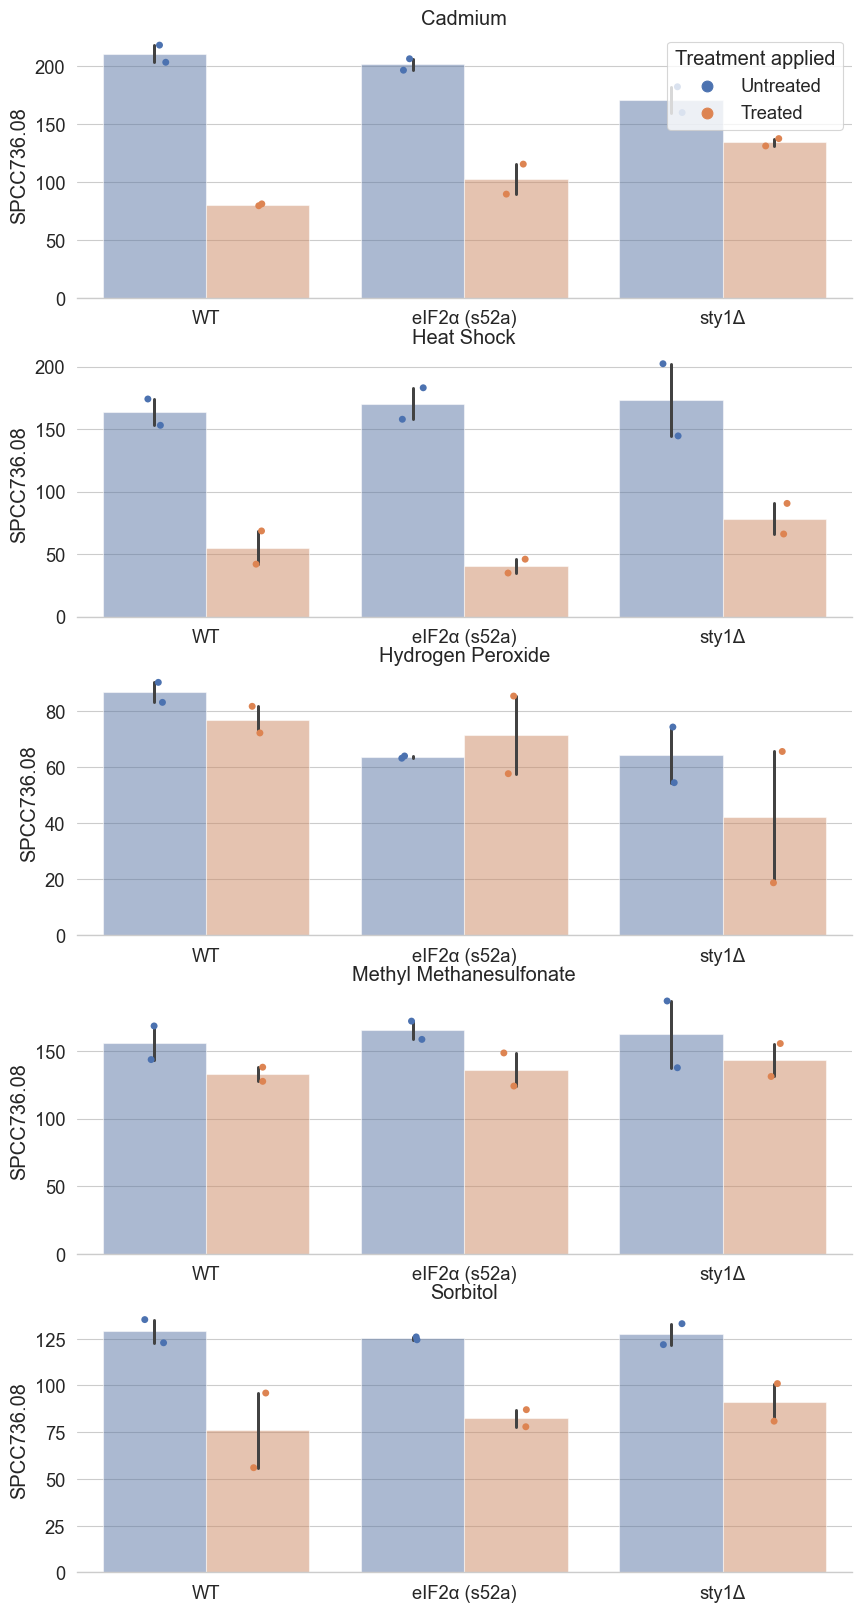

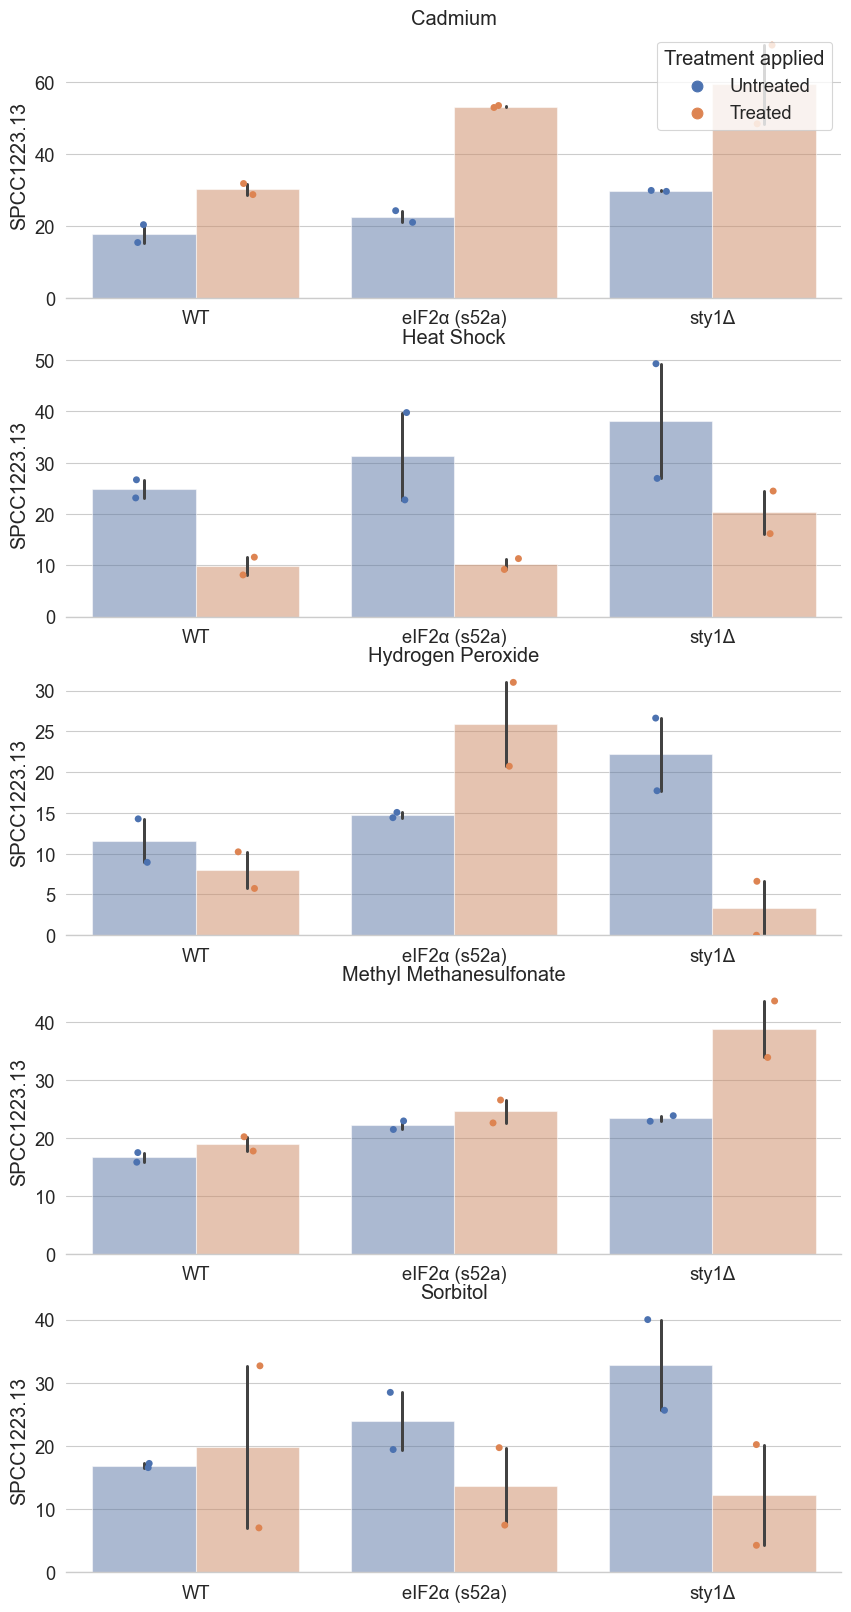

In [ ]:
#plot mbx2
plot_gene("SPBC317.01")
#gsf2
plot_gene("SPCC1742.01")
#plf3 SPBC947.04
plot_gene("SPBC947.04")
#gsf1 SPBC15D4.02
plot_gene("SPBC15D4.02")
#cbf11 SPCC736.08
plot_gene("SPCC736.08")
#cbf12 SPCC1223.13
plot_gene("SPCC1223.13")